# BASE 0

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as  pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Cargar datos
path = r'..\..\output\data_preprocess\base0_ac_last.csv'
data = pd.read_csv( path )

In [4]:
data.shape

(419, 6813)

In [5]:
data[ 'corrup_intensa' ].value_counts( normalize = True )

1.0    0.725537
0.0    0.274463
Name: corrup_intensa, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
dep_var = [ 'corrup_intensa' ]

pred_vars1 = [ '_tejgtotfun_f5r08pgercon', '_tejgge_r08ct05biser', 
              '_tejgtotfun_f5r08protsoc', '_tejgrb_redr',  
              '_tejgct_r08gstcr', 'piagfun_f5ct05pgercon',
              '_tejgct_r07gstcr', 'tdvgfun_f5ct05pgercon',
              '_tejgtotfun_f5r08amb', '_dfgdevpiagge_r08ct05popso' ]

pred_vars2 = [ '_tejgtotfun_f2opseg', '_pimgct_r13gstcp',
               '_dfgdevpiagfun_f5r08ct06protsoc', '_tejgfun_f5ct05opseg',
               'pimgfun_f5r18ct06amb', '_tejgtotfun_f5trans',
               'dfgdevpiagtotfun_f5dpub', 'dfgpimpiafun_f2ct05prevsoc',
               'tejgfun_f5ct05agro', 'piagfun_f5r18ct06energia' ]
        



X1 = data[ pred_vars1 ]
X2 = data[ pred_vars2 ]
y = data[ 'corrup_intensa' ]

In [13]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y,X1)
result1 = logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.543309
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.075     
Dependent Variable:    corrup_intensa      AIC:                 475.2934  
Date:                  2023-03-07 00:50    BIC:                 515.6721  
No. Observations:      419                 Log-Likelihood:      -227.65   
Df Model:              9                   LL-Null:             -246.22   
Df Residuals:          409                 LLR p-value:         2.4691e-05
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
_tejgtotfun_f5r08pgercon   -

In [15]:
logit_model2 = sm.Logit(y,X2)
result2 = logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.601208
         Iterations 7
                                Results: Logit
Model:                    Logit                 Pseudo R-squared:      -0.023  
Dependent Variable:       corrup_intensa        AIC:                   523.8121
Date:                     2023-03-07 00:52      BIC:                   564.1908
No. Observations:         419                   Log-Likelihood:        -251.91 
Df Model:                 9                     LL-Null:               -246.22 
Df Residuals:             409                   LLR p-value:           1.0000  
Converged:                1.0000                Scale:                 1.0000  
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score
from sklearn.metrics import classification_report

In [16]:
x_train, x_test, y_train, y_test = train_test_split( data[ pred_vars1 ], data[ 'corrup_intensa' ], test_size = 0.25 )

In [19]:
%%time

# Implementing the model
lg_model = LogisticRegression().fit( x_train, y_train )

# Predict over test set
y_lg_pred_class = lg_model.predict( x_test )
y_lg_pred_prob = lg_model.predict_proba( x_test )[ :, 1 ]

Wall time: 32.3 ms


In [20]:
# Calculating metrics
columns = [ 'no', 'si' ]
lg_report = classification_report(y_test, y_lg_pred_class, target_names = columns, output_dict = True )

lg_no_precision = lg_report[ 'no' ][ 'precision' ]
lg_no_recall = lg_report[ 'no' ][ 'recall' ]
lg_no_f1_score = lg_report[ 'no' ][ 'f1-score' ]

lg_si_precision = lg_report[ 'si' ][ 'precision' ]
lg_si_recall = lg_report[ 'si' ][ 'recall' ]
lg_si_f1_score = lg_report[ 'si' ][ 'f1-score' ]

accuracy_lg = accuracy_score( y_test, y_lg_pred_class )
log_loss_lg = log_loss( y_test, y_lg_pred_class )
roc_auc_lg = roc_auc_score( y_test, y_lg_pred_prob )

In [22]:
roc_auc_lg

0.7772449869224063

In [21]:
print( classification_report(y_test, y_lg_pred_class, target_names = columns))

              precision    recall  f1-score   support

          no       0.56      0.29      0.38        31
          si       0.75      0.91      0.82        74

    accuracy                           0.72       105
   macro avg       0.66      0.60      0.60       105
weighted avg       0.70      0.72      0.69       105



In [23]:
lg_model.coef_

array([[-0.39730064,  0.56604888, -0.00843748, -0.04444433, -0.14165806,
        -0.58033408,  0.0158754 ,  0.51729802, -0.08609331, -0.08882769]])

# BASE 1

In [24]:
path = r'..\..\output\data_preprocess\base1_ac_last.csv'
data = pd.read_csv( path )

In [27]:
dep_var = [ 'corrup_intensa' ]

pred_vars1 = [ '_tejgfun_f2ct05amb', '_tejgge_r09ct05biser', 'tdvgge_r09ct05biser',           
               'piagft_redr', 'dfgdevpiagfun_f2ct05pgercon', '_tejgfun_f5ct05amb',            
               '_tejgtotfun_f2opseg', '_tejgtotfun_f5protsoc', '_tejgfun_f5ct05opseg',
               '_tejgrb_reod' ]       

pred_vars2 = [ '_tejgct_r18srdeu', 'piagtotfun_f5dpub', '_tdvgfun_f3ct06agro',       
               'dfgdevpiagtotfun_f2turi', '_tejgfun_f2ct05protsoc', '_tejgtotfun_f2san',         
               'per_054', '_devppimtotfun_f2san', '_tdvgfun_f5r07ct05agro', 'devppimtotfun_f2edu' ]      

    
X1 = data[ pred_vars1 ]
X2 = data[ pred_vars2 ]
y = data[ 'corrup_intensa' ]

In [26]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y,X1)
result1 = logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.576243
         Iterations 6
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.094     
Dependent Variable:     corrup_intensa      AIC:                 661.9349  
Date:                   2023-03-07 01:03    BIC:                 705.1606  
No. Observations:       557                 Log-Likelihood:      -320.97   
Df Model:               9                   LL-Null:             -354.07   
Df Residuals:           547                 LLR p-value:         8.3711e-11
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         6.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
_tejgfun_f2ct05am

In [28]:
logit_model2 = sm.Logit(y,X2)
result2 = logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.645714
         Iterations 5
                            Results: Logit
Model:                 Logit              Pseudo R-squared:   -0.016  
Dependent Variable:    corrup_intensa     AIC:                739.3253
Date:                  2023-03-07 01:05   BIC:                782.5510
No. Observations:      557                Log-Likelihood:     -359.66 
Df Model:              9                  LL-Null:            -354.07 
Df Residuals:          547                LLR p-value:        1.0000  
Converged:             1.0000             Scale:              1.0000  
No. Iterations:        5.0000                                         
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------
_tejgct_r18srdeu        -0.0323   0.0299 -1.0792 0.2805 -0.0909 0.0263
pia

# RANDOM FOREST

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as  pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [44]:
# Cargar datos
path = r'..\..\output\data_preprocess\base0_ac_last.csv'
data = pd.read_csv( path )

In [45]:
data.shape

(419, 6813)

In [46]:
data[ 'corrup_intensa' ].value_counts( normalize = True )

1.0    0.725537
0.0    0.274463
Name: corrup_intensa, dtype: float64

## 2. Split variables

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
dep_var = [ 'corrup_intensa' ]
other_vars = [ 'monto_examinado', 'monto_auditado', 'monto_objeto_servicio', 
               'monto_corrup1', 'monto_corrup2', 'tipo_control', 'corrup_amplia',
               'per_corrup1', 'per_corrup2', '_monto', 'monto_' ]
pred_vars = [ col for col in data.columns if col not in dep_var and col not in other_vars ]

x_train, x_test, y_train, y_test = train_test_split( data[ pred_vars ], data[ 'corrup_intensa' ], test_size = 0.25 )

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [50]:
sel = SelectFromModel( RandomForestClassifier() )
sel.fit( x_train, y_train )

SelectFromModel(estimator=RandomForestClassifier())

In [51]:
sel.get_support()

array([False,  True, False, ...,  True, False,  True])

In [52]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

1683

In [53]:
print(selected_feat)

Index(['web', 'mue_pro_10', 'mue_pro_20', 'mue_pro_21', 'impres_muni_3',
       'info_muni_2', 'per_001', 'per_003', 'per_004', 'per_011',
       ...
       '_tdvgtotfun_f5trans', '_devppimtotfun_f5trans', '_tdvgtotfun_f5turi',
       '_dfgpimpiatotfun_f5turi', '_dfgdevpiagtotfun_f5turi',
       '_piagtotfun_f5viv', '_pimgtotfun_f5viv', '_tdvgtotfun_f5viv',
       '_dfgpimpiatotfun_f5viv', '_devppimtotfun_f5viv'],
      dtype='object', length=1683)


In [60]:
new_pred = pd.DataFrame( selected_feat ).head ( 10 ).values.tolist()

<AxesSubplot:>

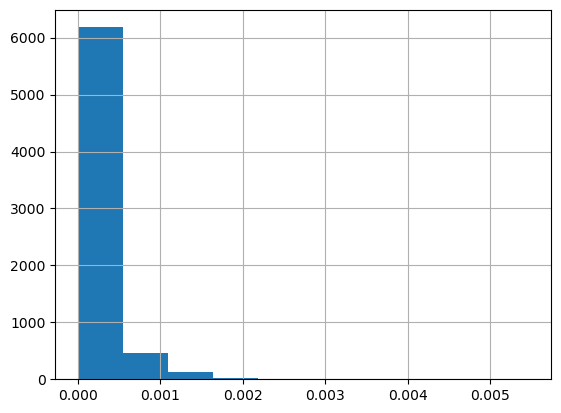

In [54]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [63]:
new_pred = [ 'web', 'mue_pro_10', 'mue_pro_20', 'mue_pro_21', 'impres_muni_3',
             'info_muni_2', 'per_001', 'per_003', 'per_004', 'per_011' ]

In [64]:
X1 = data[ new_pred ]
y = data[ 'corrup_intensa' ]

In [65]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y,X1)
result1 = logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.575749
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.020   
Dependent Variable: corrup_intensa   AIC:              502.4778
Date:               2023-03-07 01:23 BIC:              542.8565
No. Observations:   419              Log-Likelihood:   -241.24 
Df Model:           9                LL-Null:          -246.22 
Df Residuals:       409              LLR p-value:      0.35286 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
web               0.1715   0.2795  0.6135 0.5395 -0.3763 0.7193
mue_pro_10        0.0574   0.1850  0.3105 0.7562 -0.3052 0.4200
mue_pro_20       -0.0050   